# Tarea - Polars

Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para Enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:

    Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
    Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero
    Qué tipo de taxi recibe más propinas en promedio
    Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi
    Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero
    Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

Eres libre de utilizar la biblioteca que quieras para realizar las gráficas. Recuerda incluir notas en Markdown para darle una mejor calidad a tu informe estadístico.

P.D.: no te recomiendo que le pidas ayuda a un LLM para ayudarte, no sabe el contexto de tu dataset y por lo general tampoco sabe usar Polars, es mejor irte directo a la documentación o mandar mensaje al Telegram si tienes dudas UwU.

P.D. 2: Puedes usar la interfaz SQL de Polars para resolver sólo uno de los ejercicios (sino es trampa lmao), todo esta en la documentación w.

In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
yellow = pl.read_parquet('yellow_tripdata_2025-01.parquet')
green = pl.read_parquet('green_tripdata_2025-01.parquet')
fhv = pl.read_parquet('fhv_tripdata_2025-01.parquet')
fhvhv = pl.read_parquet('fhvhv_tripdata_2025-01.parquet')

# 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

## Análisis del caso
Para el archivo de yellow y green, encontramos la columna llamada:
- total_amount
- Para el caso de FHVHV, está la columna:
- base_passenger_fare

En el caso de FHV, no encontramos ninguna columna que pueda estar asociada a los ingresos brutos.

In [3]:
yellow_promedio = yellow.select(pl.col("total_amount").mean()).item()
green_promedio = green.select(pl.col("total_amount").mean()).item()
fhvhv_promedio = fhvhv.select(pl.col("base_passenger_fare").mean()).item()

print(f"\nIngreso bruto promedio por taxi Yellow: ${yellow_promedio:.2f}")
print(f"Ingreso bruto promedio por taxi Green: ${green_promedio:.2f}")
print(f"Ingreso bruto promedio por taxi FHVHV: ${fhvhv_promedio:.2f}")

promedio_total = (yellow_promedio + green_promedio + fhvhv_promedio) / 3
print(f"\nIngreso bruto promedio de los tres taxis: ${promedio_total:.2f}")


Ingreso bruto promedio por taxi Yellow: $25.61
Ingreso bruto promedio por taxi Green: $22.63
Ingreso bruto promedio por taxi FHVHV: $24.27

Ingreso bruto promedio de los tres taxis: $24.17


# 2. ¿Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero?


Columnas Importantes:
- trip_distance (Yellow, Green)
- trip_miles (FHVHV)

FHV no tiene una columna de distancia, por lo que no se incluiría en este análisis.

Supondremos que los datos de trip_distance se miden también en millas.

In [4]:
# Distancia promedio total recorrida por cada tipo de taxi
yellow_distancia = yellow.select(pl.col("trip_distance").mean()).item()
green_distancia = green.select(pl.col("trip_distance").mean()).item()
fhvhv_distancia = fhvhv.select(pl.col("trip_miles").mean()).item()

print(f"\nDistancia promedio recorrida por taxi Yellow: {yellow_distancia:.2f} millas")
print(f"Distancia promedio recorrida por taxi Green: {green_distancia:.2f} millas")
print(f"Distancia promedio recorrida por taxi FHVHV: {fhvhv_distancia:.2f} millas")


Distancia promedio recorrida por taxi Yellow: 5.86 millas
Distancia promedio recorrida por taxi Green: 21.53 millas
Distancia promedio recorrida por taxi FHVHV: 4.85 millas


# 3. ¿Qué tipo de taxi recibe más propinas en promedio?


Columnas relevantes:
- tip_amount (Yellow, Green)
- tips (FHVHV)

FHV no tiene una columna de propinas, así que se omite en este análisis.


In [5]:
# Promedio de propinas por taxi
yellow_propina = yellow.select(pl.col("tip_amount").mean()).item()
green_propina = green.select(pl.col("tip_amount").mean()).item()
fhvhv_propina = fhvhv.select(pl.col("tips").mean()).item()

print(f"\nPropina promedio por taxi Yellow: ${yellow_propina:.2f}")
print(f"Propina promedio por taxi Green: ${green_propina:.2f}")
print(f"Propina promedio por taxi FHVHV: ${fhvhv_propina:.2f}")


Propina promedio por taxi Yellow: $2.96
Propina promedio por taxi Green: $2.48
Propina promedio por taxi FHVHV: $1.04


# 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi


Columnas clave:
- tolls_amount (Yellow, Green)
- tolls (FHVHV)

FHV no tiene una columna de peajes.



Peaje promedio por taxi Yellow: $0.45
Peaje promedio por taxi Green: $0.18
Peaje promedio por taxi FHVHV: $1.03


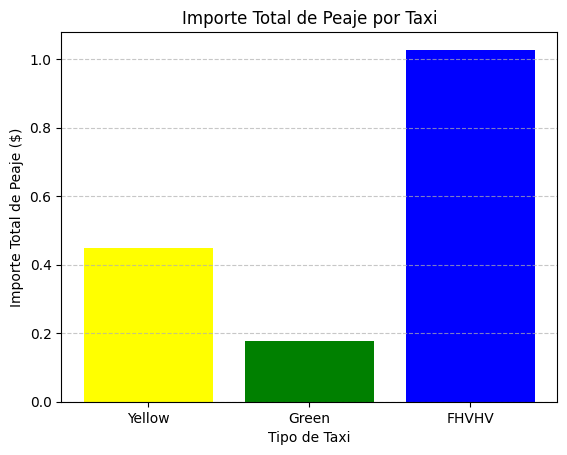

In [6]:
# Cálculo del peaje total de cada tipo de taxi
yellow_peaje = yellow.select(pl.col("tolls_amount").mean()).item()
green_peaje = green.select(pl.col("tolls_amount").mean()).item()
fhvhv_peaje = fhvhv.select(pl.col("tolls").mean()).item()

print(f"\nPeaje promedio por taxi Yellow: ${yellow_peaje:.2f}")
print(f"Peaje promedio por taxi Green: ${green_peaje:.2f}")
print(f"Peaje promedio por taxi FHVHV: ${fhvhv_peaje:.2f}")

# Grafico
plt.bar(['Yellow', 'Green', 'FHVHV'], 
        [yellow_peaje, green_peaje, fhvhv_peaje], 
        color=['yellow', 'green', 'blue'])
plt.title('Importe Total de Peaje por Taxi')
plt.xlabel('Tipo de Taxi')
plt.ylabel('Importe Total de Peaje ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Mapa de calor: Horas en las que se tomaron los taxis durante Enero


Columnas clave:
- tpep_pickup_datetime (Yellow)
- lpep_pickup_datetime (Green)
- pickup_datetime (FHV, FHVHV)


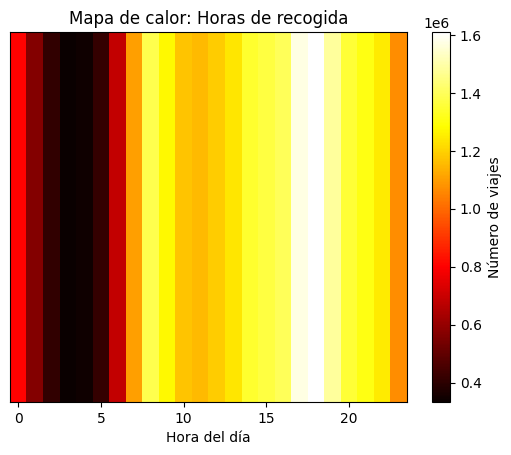

In [21]:
# Combinamos todos los datos de las diferentes categorías de taxis en un solo DataFrame de Polars
taxis_horas = pl.concat([
    yellow.select(pl.col('tpep_pickup_datetime').alias('pickup_datetime')),
    green.select(pl.col('lpep_pickup_datetime').alias('pickup_datetime')),
    fhv.select(pl.col('pickup_datetime')),
    fhvhv.select(pl.col('pickup_datetime'))
])

# Convertimos la columna de fecha y hora a tipo datetime y extraemos la hora
taxis_horas = taxis_horas.with_columns(
    pl.col('pickup_datetime').cast(pl.Datetime).dt.hour().alias('hora')
)

# Agrupamos por hora y contamos el número de viajes
viajes_por_hora = taxis_horas.group_by('hora').len().sort('hora')

# Graficar mapa de calor
plt.imshow(viajes_por_hora['len'].to_numpy().reshape(1, -1), cmap='hot', aspect='auto')
plt.colorbar(label='Número de viajes')
plt.title('Mapa de calor: Horas de recogida')
plt.xlabel('Hora del día')
plt.yticks([])
plt.show()

# 6. Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio


Columnas clave:
- tpep_pickup_datetime (Yellow)
- lpep_pickup_datetime (Green)
- pickup_datetime (FHV, FHVHV)


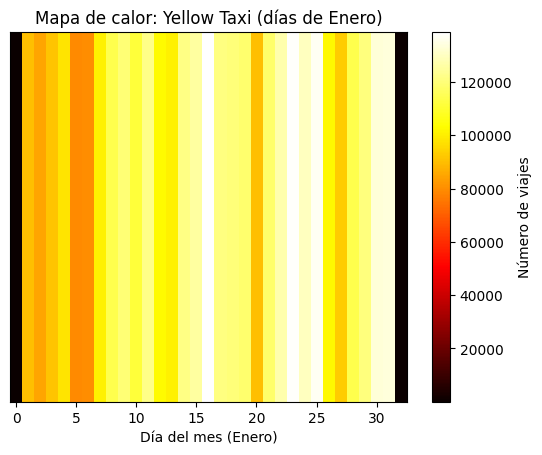

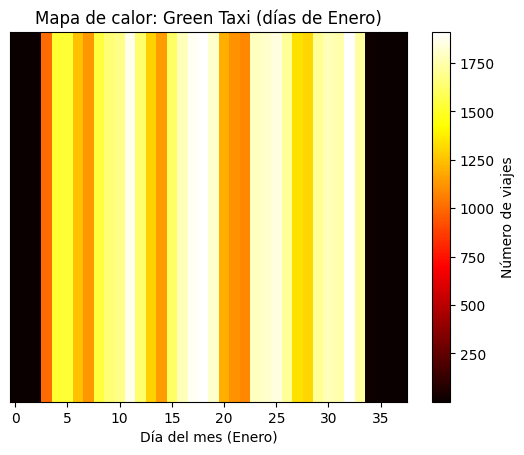

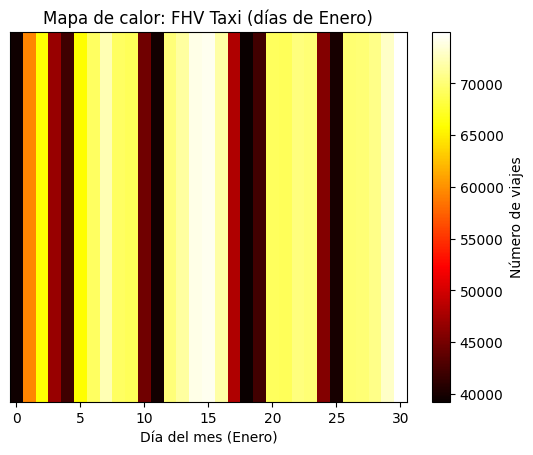

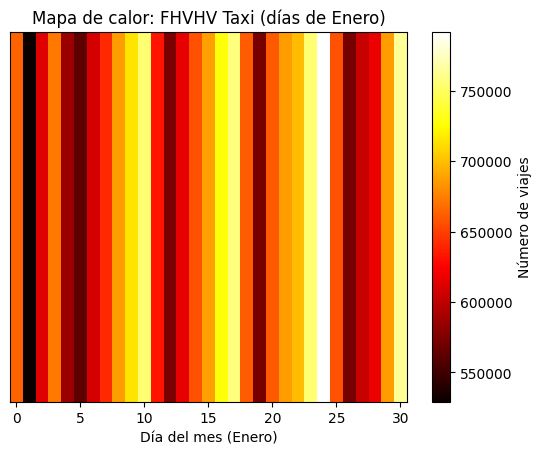

In [20]:
def generar_mapa_calor_diario(df: pl.DataFrame, columna_fecha: str, nombre_taxi: str):
    """Genera un mapa de calor de viajes por día para un tipo de taxi."""
    df_diario = df.with_columns(
        pl.col(columna_fecha).cast(pl.Datetime).dt.date().alias('dia')
    ).group_by('dia').len().sort('dia')

    plt.imshow(df_diario['len'].to_numpy().reshape(1, -1), cmap='hot', aspect='auto')  # Cambiamos 'count' a 'len'
    plt.colorbar(label='Número de viajes')
    plt.title(f'Mapa de calor: {nombre_taxi} (días de Enero)')
    plt.xlabel('Día del mes (Enero)')
    plt.yticks([])
    plt.show()

# Asegúrate de que tus DataFrames de Polars (yellow, green, fhv, fhvhv) estén cargados

generar_mapa_calor_diario(yellow, 'tpep_pickup_datetime', 'Yellow Taxi')
generar_mapa_calor_diario(green, 'lpep_pickup_datetime', 'Green Taxi')
generar_mapa_calor_diario(fhv, 'pickup_datetime', 'FHV Taxi')
generar_mapa_calor_diario(fhvhv, 'pickup_datetime', 'FHVHV Taxi')